# Data Mining Assignment

Import the wine dataset and mine the required results.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

In [5]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
df.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0  
5                          2.85   1450.0       0  
6                          3.58   1290.0       0  
7                          3.58   1295.0       0  
8                          2.85   1045.0       0  
9                          3.55   1045.0       0

In [7]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

**(a): Load the wine dataset. Which feature is categorical and why? Compute the frequency (not the occurrence) of each value of the categorical feature.**

A: The target variable is categorical, as it represents the class labels for the different types of wines.


In [8]:
cnt1,cnt2,cnt3=0,0,0

for i in df['target']:
    if i==0:
        cnt1+=1
    elif i==1:
        cnt2+=1
    else:
        cnt3+=1

print("Class-0: ", cnt1)
print("Class-1: ", cnt2)
print("Class-2: ", cnt3)

Class-0:  59
Class-1:  71
Class-2:  48


**(b): Compute two different univariate and two different multivariate summaries for all numerical features.**

A: All the features in data.feature_names are numerical, which are used in the calculation of wine class.

Two univariate summaries:

1. **Histograms**: Histograms represent frequency of one numerical variable. They display distribution using bins and plotting the frequency in each bin.

2. **Box-plots**: Boxplots provide summary by five factors: Min, Max, Quartile-1, Quartile-2(Median), Quartile-3. It is useful for detecting outliers.

Two multivariate summaries:

1. **Correlation Matrix**: Correlation matrices quantify the strength and direction of linear relationships between multiple numerical variables. Each entry in the matrix represents the correlation coefficient. We can visualise their correlation through heatmaps.

2. **Pairplots**: Pairplots display pairwise relationships between multiple numerical variables in a dataset. They consist of scatterplots and histograms(on diagonal) for each pair of variables.

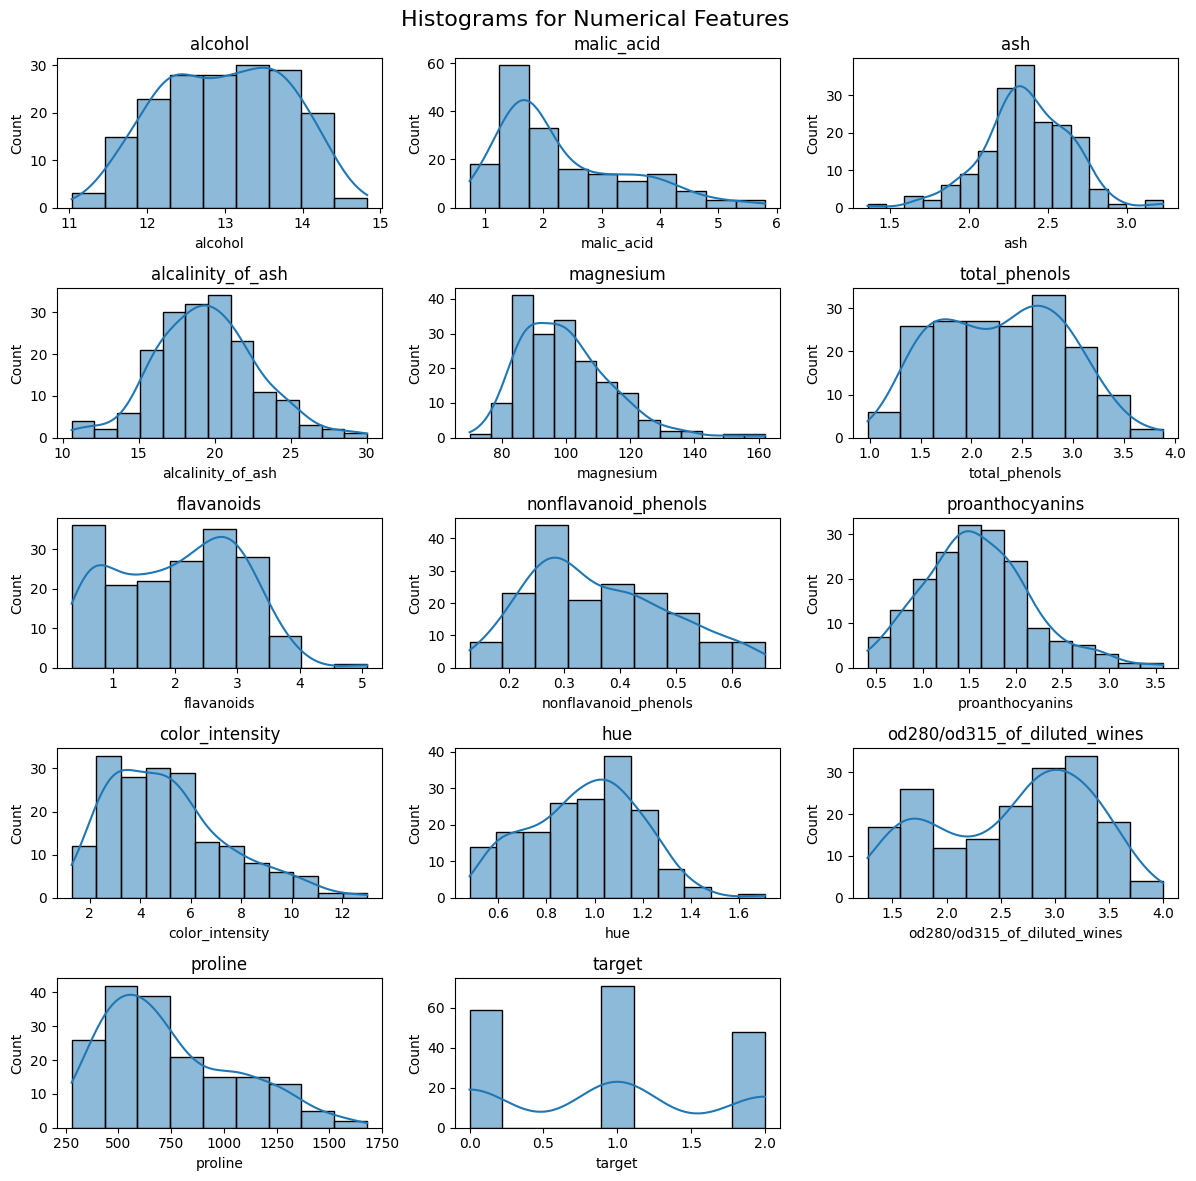

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 12))
plt.suptitle('Histograms for Numerical Features', fontsize=16)
for i, column in enumerate(df.columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

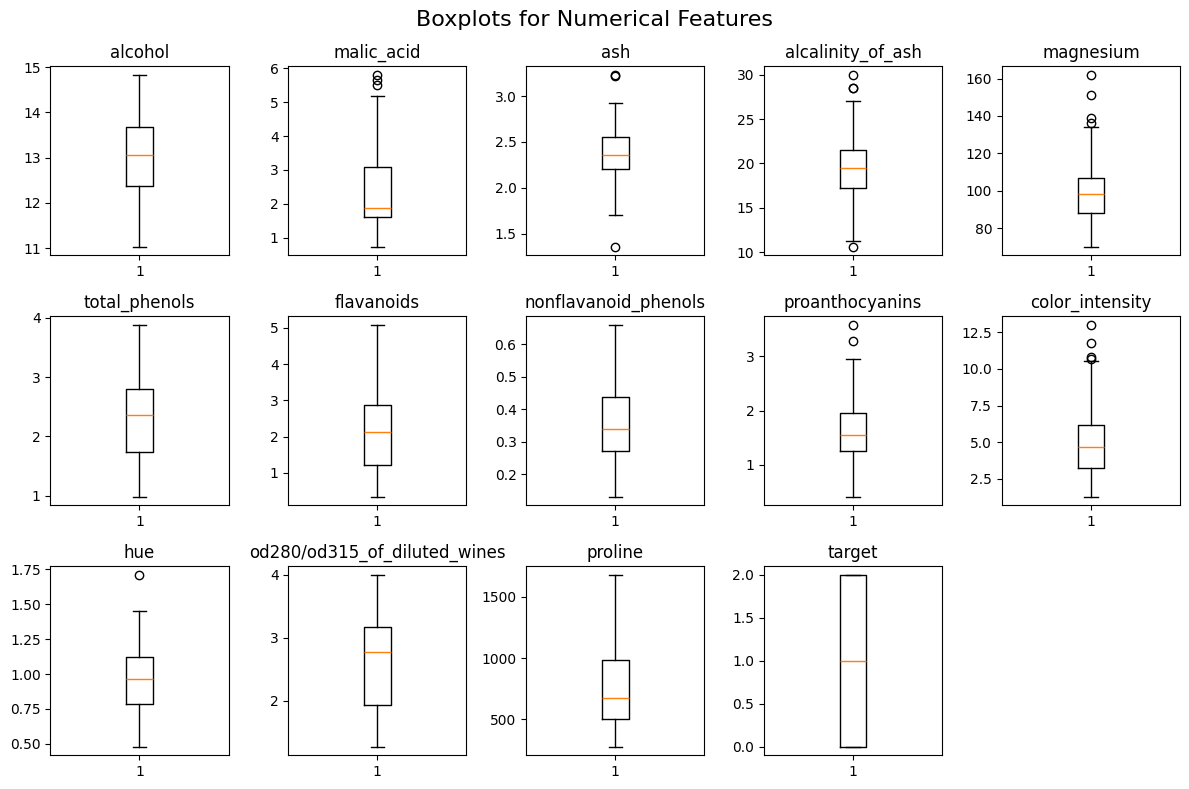

In [10]:
plt.figure(figsize=(12, 8))
plt.suptitle('Boxplots for Numerical Features', fontsize=16)
for i, column in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

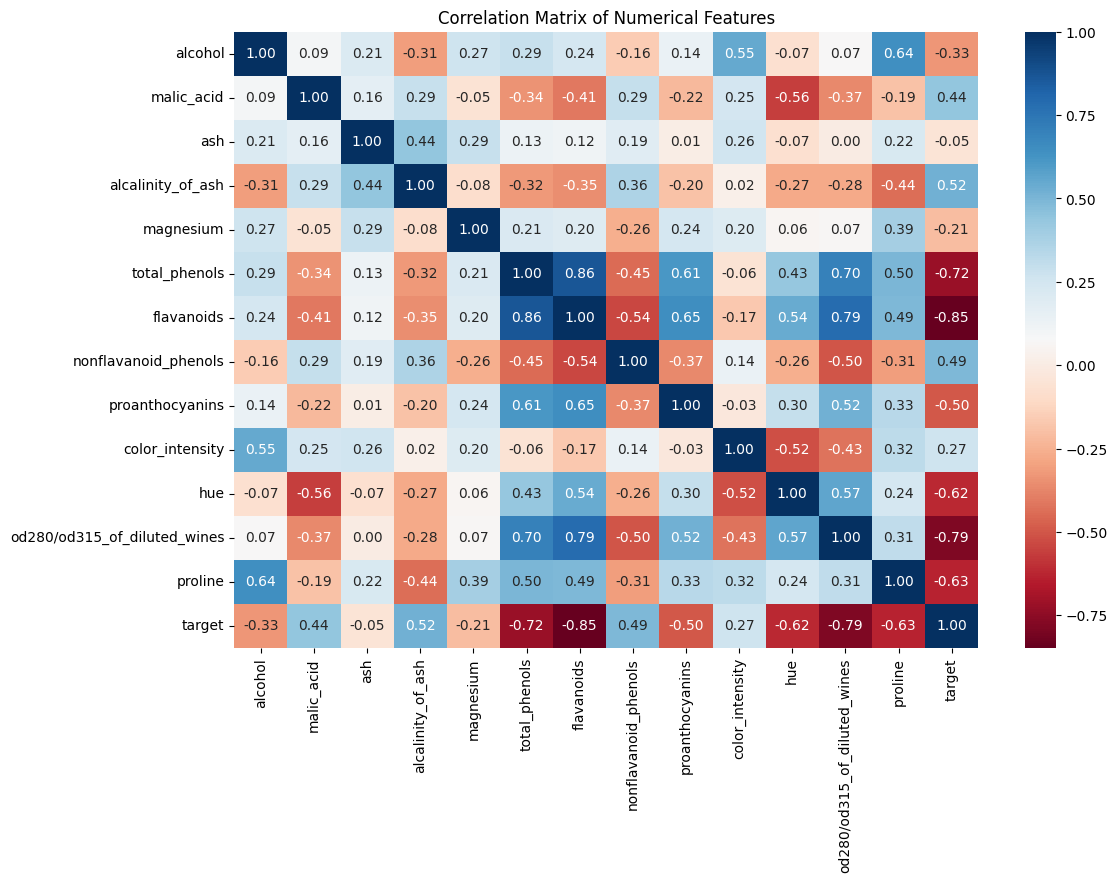

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<Figure size 2400x1200 with 0 Axes>

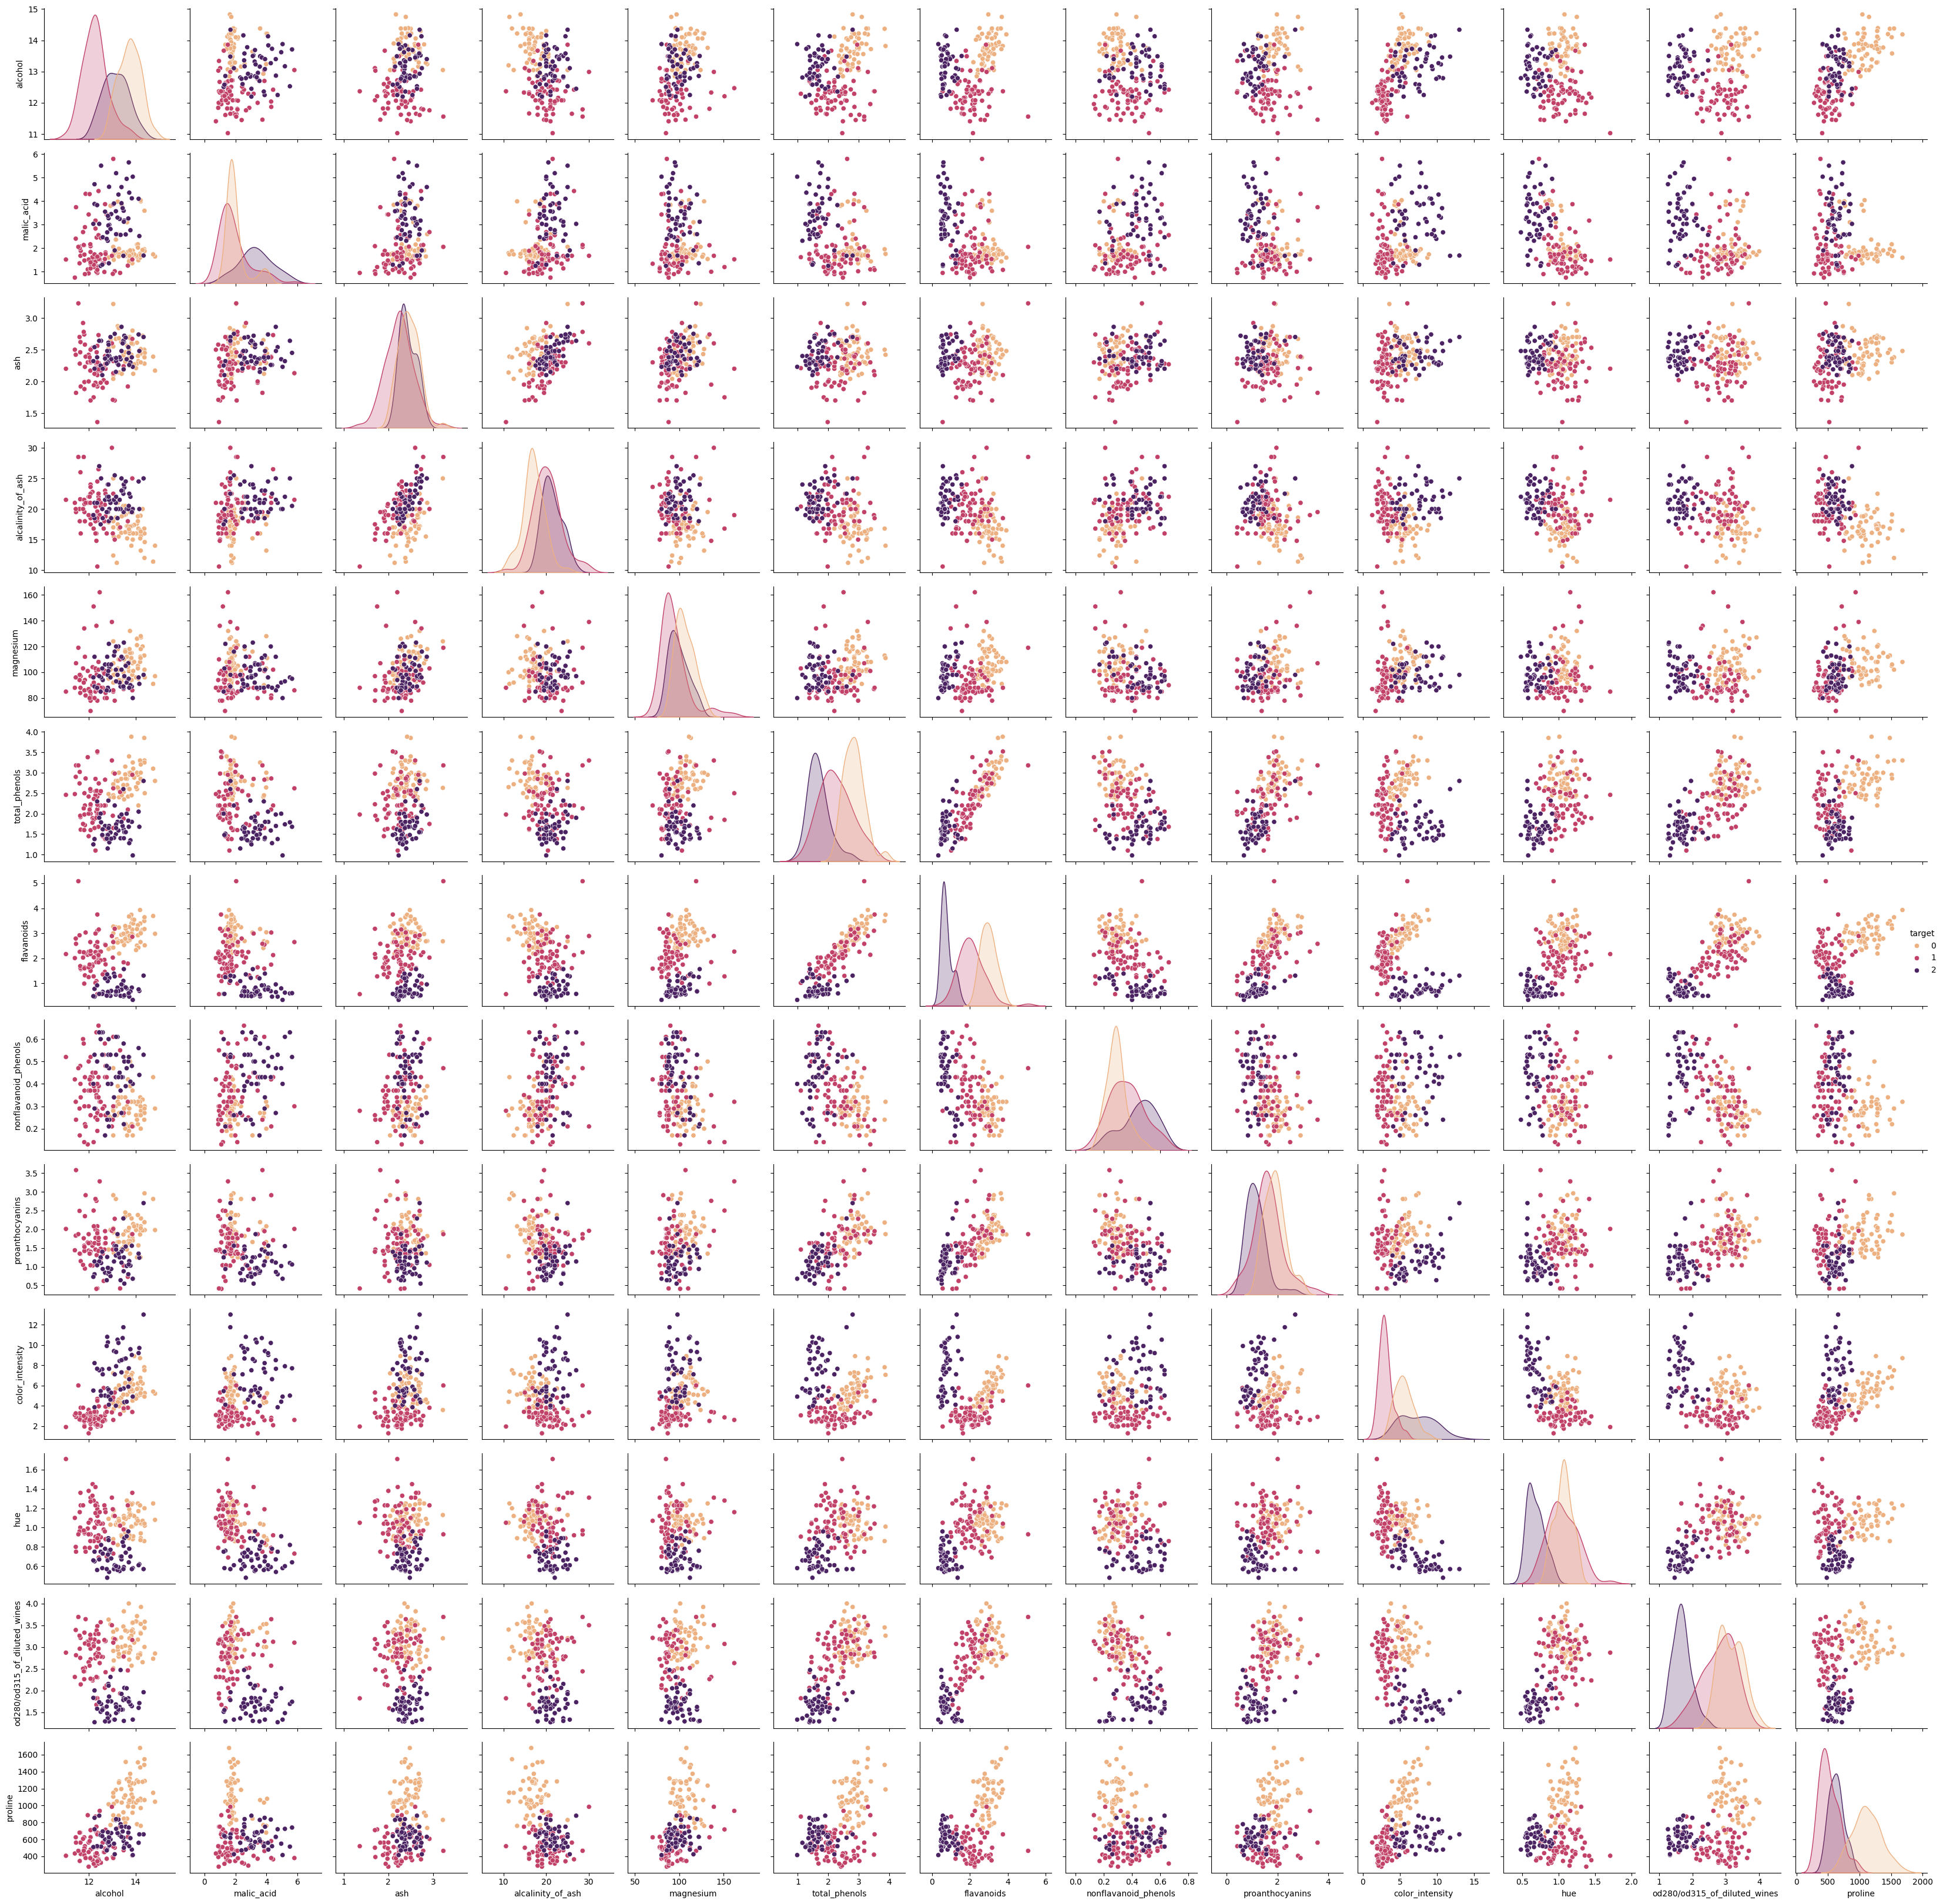

In [13]:
plt.figure(figsize=(24, 12))
plt.suptitle('Pairplots for Numerical Features', fontsize=16)
sns.pairplot(df, hue='target', palette="flare")
plt.tight_layout()
plt.show()

**(c):  Group observations by the categorical feature & compute the corresponding median for each remaining numerical feature.**

A: We use the method of groupby() on the dataframe in pandas, which groups rows by the target class. Now we can simply get the median, using the function on it.

In [14]:
# Group observations by the categorical feature (target) and compute median
median_by_category = df.groupby('target').median()

# Display the median for each numerical feature grouped by the categorical feature
print("Median for each numerical feature grouped by the categorical feature (target):")
print(median_by_category.transpose())

Median for each numerical feature grouped by the categorical feature (target):
target                              0       1        2
alcohol                         13.75   12.29   13.165
malic_acid                       1.77    1.61    3.265
ash                              2.44    2.24    2.380
alcalinity_of_ash               16.80   20.00   21.000
magnesium                      104.00   88.00   97.000
total_phenols                    2.80    2.20    1.635
flavanoids                       2.98    2.03    0.685
nonflavanoid_phenols             0.29    0.37    0.470
proanthocyanins                  1.87    1.61    1.105
color_intensity                  5.40    2.90    7.550
hue                              1.07    1.04    0.665
od280/od315_of_diluted_wines     3.17    2.83    1.660
proline                       1095.00  495.00  627.500


**(d): Create a scatter plot for the pair of distinct numerical features with the highest correlation.**

A: We can get the highest correlation from correlation matrix easily.
We can see the most blue is 1. But 1 is for non-distinct pairs. So we need to search for most blue value in cells other than diagonals.

We find it is the block with flavanoids and total_phenols.

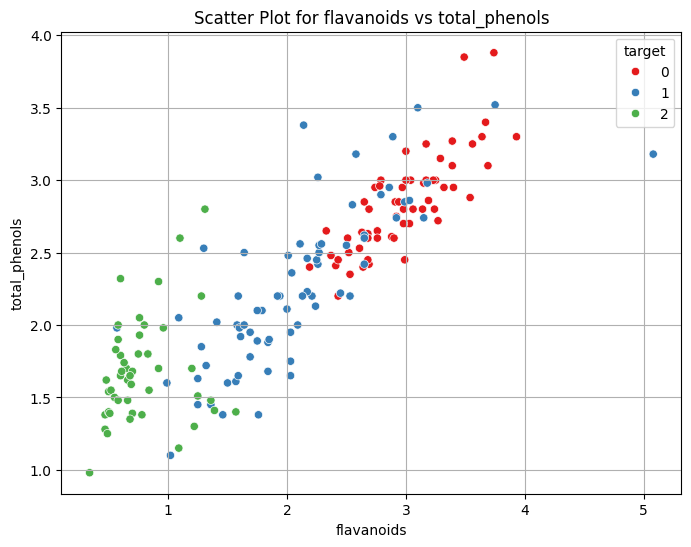

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a scatter plot for the pair of features with the highest correlation
f1, f2 = "flavanoids", "total_phenols"

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=f1, y=f2, hue=df['target'], palette='Set1')
plt.title(f'Scatter Plot for {f1} vs {f2}')
plt.xlabel(f1)
plt.ylabel(f2)
plt.grid(True)
plt.show()


#Question:
Load the file customer-income.csv which includes numerical and categorical features. Perform data cleaning to replace any NaN values with the mean value of that particular feature. Then replace any categorical features with numerical features. Display the resulting dataset. You can use the sklearn.impute and sklearn.preprocessing packages to assist you.

In [16]:
df = pd.read_csv("/content/Customer_Salary.csv")
df

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0      NaN       Yes

NaN values taken care of by the imputer, using mean of respective column to fill up.italicised text

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['Age', 'Salary']] = imputer.fit_transform(df[['Age', 'Salary']])
df

Country        Age   Salary Purchased
0   France  44.000000  72000.0        No
1    Spain  27.000000  48000.0       Yes
2  Germany  30.000000  54000.0        No
3    Spain  38.000000  61000.0        No
4  Germany  40.000000  63375.0       Yes
5   France  35.000000  58000.0       Yes
6    Spain  38.777778  52000.0        No
7   France  48.000000  79000.0       Yes
8  Germany  50.000000  83000.0        No
9   France  37.000000  63375.0       Yes

We have two categorical values: Country and Purchased.

Countries has three unique values, and Purchased is either Yes or No.

We have used simple **map()** function to encode the categorical values as numerical.

In [18]:
countries = set(df['Country'])
purchased = set(df['Purchased'])
print(countries)
print(purchased)

{'Spain', 'Germany', 'France'}
{'Yes', 'No'}


In [19]:
cmap={'Germany':1, 'France':2, 'Spain':3}
pmap={'Yes':1, 'No':0}

df['Country'] = df['Country'].map(cmap)
df['Purchased'] = df['Purchased'].map(pmap)
df

Country        Age   Salary  Purchased
0        2  44.000000  72000.0          0
1        3  27.000000  48000.0          1
2        1  30.000000  54000.0          0
3        3  38.000000  61000.0          0
4        1  40.000000  63375.0          1
5        2  35.000000  58000.0          1
6        3  38.777778  52000.0          0
7        2  48.000000  79000.0          1
8        1  50.000000  83000.0          0
9        2  37.000000  63375.0          1

#Question-3:

**(a): Using the wine dataset from question 1, perform Principal Component Analysis (PCA) with 2 components.**

A: Performed PCA with 2 components using sklearn.decomposition package.

In [20]:
from sklearn.decomposition import PCA

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
df_principal_components = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("Resulting DataFrame after PCA with 2 components:")
print(df_principal_components)

Resulting DataFrame after PCA with 2 components:
            PC1        PC2
0    318.562979  21.492131
1    303.097420  -5.364718
2    438.061133  -6.537309
3    733.240139   0.192729
4    -11.571428  18.489995
..          ...        ...
173   -6.980211  -4.541137
174    3.131605   2.335191
175   88.458074  18.776285
176   93.456242  18.670819
177 -186.943190  -0.213331

[178 rows x 2 columns]


**(b) Transform the data and plot the scatterplot of all samples along the two principal components, color-coded according to the "target" column (this column is the class and should not be used in the PCA analysis)**

A: We have plotted a scatterplot with columns PC1 and PC2 calculated above *without* target in it. But we are giving it hue according to target values.

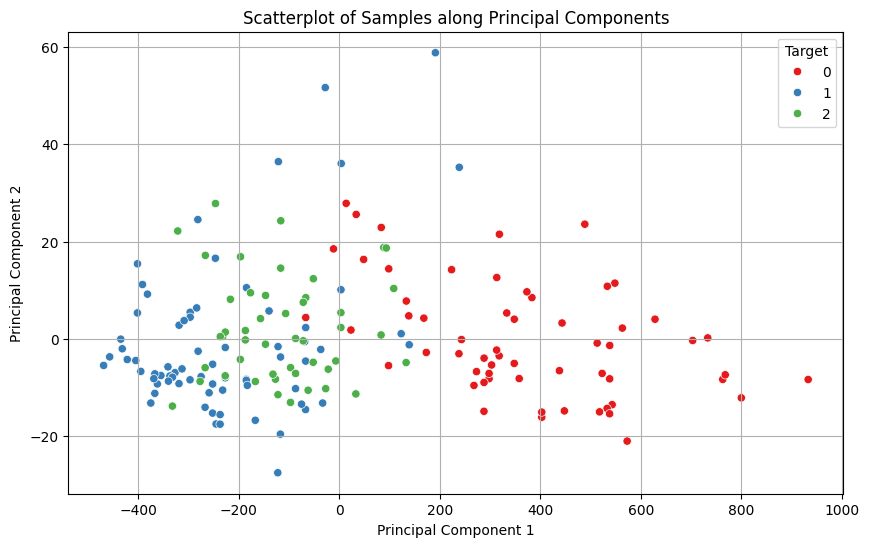

In [21]:
df_with_labels = pd.concat([df_principal_components, pd.Series(data.target, name='target')], axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_labels, x='PC1', y='PC2', hue='target', palette='Set1', legend='full')
plt.title('Scatterplot of Samples along Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()

**(c) What insights can you obtain by viewing the scatterplot of the principal components?**

A: We can infer many things from the Principal component analysis:

1. Cluster Separation: We can see that the classes 1 and 2 are less separable than 0.
2. Data Variability: A tight cluster of points of classes 1 and 2 suggests low variability in them, while a more spread-out distribution indicates higher variability such as in class 0.
3. Outlier Detection: We can see the points in classes which are thrown far away from main cluster group, which can be disregarded as outliers.
4. Correlation between variables: We can see that the class 1 and 2 points are in one direction while the class 0 is in another direction. This similar direction implies higher correlation between the class 1 and class 2, and lesser correlation with the class 0.

**(d) Can you easily distinguish the samples that belong to one class from the samples that belong to another class and so on? In other words, are the different classes (quite) distinctive one from the other, or is there a lot of overlap?**

A: No, we can distinguish class 0 wine from class 1 and class 2, but we cannot tell class 1 and 2 apart, as there is a lot of overlapping between them.

**(e) If it is the latter, then why is this happening? What can be done to the data prior to performing PCA in order to alleviate this issue?**

A: The overlapping between classes 1 and 2 observed in the PCA plot suggests that these classes share similarities in their feature distributions, making them difficult to distinguish.

In order to make them more distinguishable, we can apply feature scaling for all all features to scale them such that their mean is zero and variance is one. This ensures that features with larger scales do not dominate the principal components and helps PCA capture the underlying structure of the data more effectively.

**(f) Do this action first and then perform PCA with 2 components, transform the data and plot the scatterplot of all samples along these two principal components, color-coded according to the "target" column. Now are the different classes (quite) distinctive one from the other?**

A: We can clearly now distinguish between the three classes and cluster them easily. Thus we can say that feature scaling is an important preprocessing step, especially when using dimensionality reduction techniques like PCA.

It helps in ensuring that each feature contributes equally to the principal components, allowing for better separation and visualization of classes.

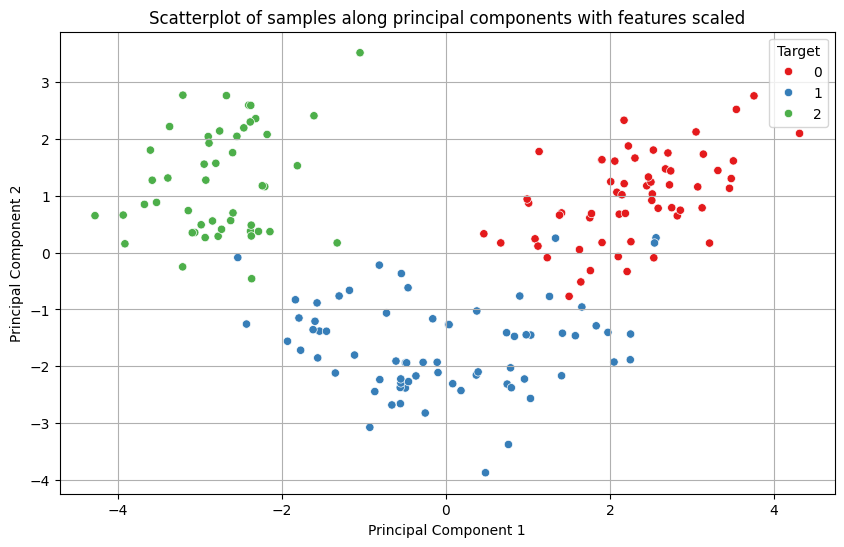

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = load_wine()

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.data)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_principal_components = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

df_with_labels = pd.concat([df_principal_components, pd.Series(data.target, name='target')], axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_labels, x='PC1', y='PC2', hue='target', palette='Set1', legend='full')
plt.title('Scatterplot of samples along principal components with features scaled')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()

Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


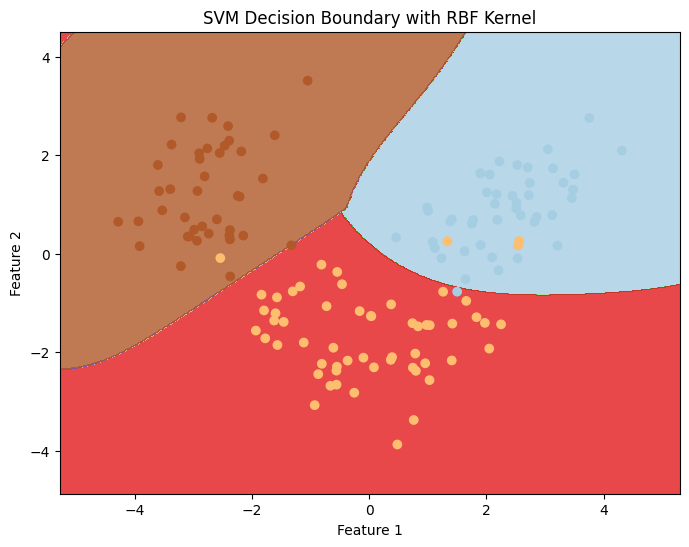

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with feature columns and a target column
# Example: df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

# Split data into features (X) and target (y)
X = df_with_labels[['PC1', 'PC2']]  # Assuming feature columns are named 'feature1' and 'feature2'
y = df_with_labels['target']  # Assuming target column is named 'target'

# Split data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Optionally, evaluate the classifier on the test set
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the decision boundary (optional)
# This part assumes your data is 2D for visualization purposes
if X_train.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    h = .02  # step size in the mesh
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary with RBF Kernel')
    plt.show()


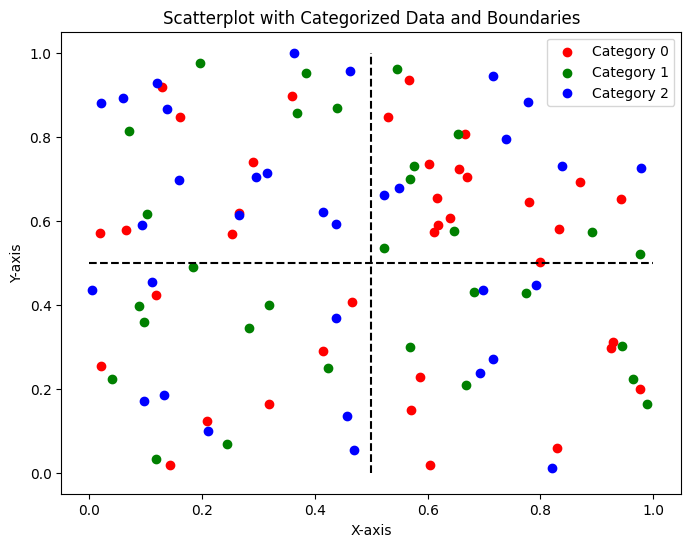

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data with categories
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)
categories = np.random.randint(0, 3, 100)  # Randomly assign categories (0, 1, or 2)

# Create scatterplot
plt.figure(figsize=(8, 6))

# Assign colors based on categories
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(x[categories == i], y[categories == i], c=colors[i], label=f'Category {i}')

# Draw boundaries
plt.plot([0.5, 0.5], [0, 1], color='black', linestyle='--')
plt.plot([0, 1], [0.5, 0.5], color='black', linestyle='--')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatterplot with Categorized Data and Boundaries')
plt.legend()

# Show plot
plt.show()